In [ ]:
import numpy as np
import math
!pip install vector
import vector
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stat_fr = np.array([[36961, 2503],
                      [43621, 2992],
                      [15694, 1042],
                      [36231, 2487],
                      [29945, 2014],
                      [40588, 2805],
                      [75255, 5062],
                      [37709, 2643],
                      [30899, 2126],
                      [25486, 1784],
                      [37497, 2641],
                      [40398, 2766],
                      [74105, 5047],
                      [76725, 5312],
                      [18317, 1215]])

stat_en = np.array([[35680, 2217],
                      [42514, 2761],
                      [15162, 990],
                      [35298, 2274],
                      [29800, 1865],
                      [40255, 2606],
                      [74532, 4805],
                      [37464, 2396],
                      [31030, 1993],
                      [24843, 1627],
                      [36172, 2375],
                      [39552, 2560],
                      [72545, 4597],
                      [75352, 4871],
                      [18031, 1119]])


In [ ]:
def normalize(observations):
    maxima = [max([obs[i] for obs in observations]) for i in range(len(observations[0]))]
    return ([[obs[i] / maxima[i]
              for i in range(len(observations[0]))] for obs in observations],
            maxima)

In [ ]:
def predict(X, w):
    return vector.mul_mat_vec(X, w)

In [ ]:
def sse(X, y, w):
    error = vector.sub(y, vector.mul_mat_vec(X, w))
    return vector.dot(error, error)

In [ ]:
def fit_stoch(X, y, alpha, w,
                  epochs=500,
                  epsilon=1.0e-5):
    """
    Stochastic gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs, logs_stoch
    logs = []
    logs_stoch = []
    random.seed(0)
    idx = list(range(len(X)))
    for epoch in range(epochs):
        random.shuffle(idx)
        for i in idx:
            y_hat = predict([X[i]], w)[0]
            loss = y[i] - y_hat
            gradient = vector.mul(loss, X[i])
            w = vector.add(w, vector.mul(alpha, gradient))
            logs_stoch += (w, alpha, sse(X, y, w))
        if vector.norm(gradient) < epsilon:
            print('Gradient', vector.norm(gradient))
            break
        logs += (w, alpha, sse(X, y, w))
    print("Epoch", epoch)
    return w

In [ ]:

def fit_batch(X, y, alpha, w,
                  epochs=500,
                  epsilon=1.0e-5):
    """
    Batch gradient descent
    :param X:
    :param y:
    :param alpha:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    global logs
    logs = []
    alpha /= len(X)
    for epoch in range(epochs):
        y_hat = predict(X, w)
        loss = vector.sub(y, y_hat)
        gradient = vector.mul_mat_vec(vector.transpose(X), loss)
        w = vector.add(w, vector.mul(alpha, gradient))
        logs += (w, alpha, sse(X, y, w))
        if vector.norm(gradient) < epsilon:
            break
    print("Epoch", epoch)
    return w

In [ ]:
X = [[1, 35680.0],
     [1, 42514.0],
    [1, 15162.0],
     [1, 35298.0],
     [1, 29800.0],
     [1, 40255.0],
     [1, 74532.0],
     [1, 37464.0],
     [1, 31030.0],
     [1, 24843.0],
     [1, 36172.0],
     [1, 39552.0],
     [1, 72545.0],
     [1, 75352.0],
     [1, 18031.0]]

#X = [[1, 36961.0],
#     [1, 43621.0],
#     [1, 15694.0],
#     [1, 36231.0],
#     [1, 29945.0],
#     [1, 40588.0],
#     [1, 75255.0],
#     [1, 37709.0],
#     [1, 30899.0],
#     [1, 25486.0],
#     [1, 37497.0],
#     [1, 40398.0],
#     [1, 74105.0],
#     [1, 76725.0],
#     [1, 18317.0]]


In [ ]:
y = [2217.0,
     2761.0,
     990.0,
     2274.0,
     1865.0,
     2606.0,
     4805.0,
     2396.0,
     1993.0,
     1627.0,
     2375.0,
     2560.0,
     4597.0,
     4871.0,
     1119.0]

#y = [2503.0,
#     2992.0,
#     1042.0,
#     2487.0,
#     2014.0,
#     2805.0,
#     5062.0,
#     2643.0,
#     2126.0,
#     1784.0,
#     2641.0,
#     2766.0,
#     5047.0,
#     5312.0,
#     1215.0]


In [ ]:
normalized = True
debug = False

alpha = 1.0e-10
if normalized:
    X, maxima_X = normalize(X)
    maxima_y = max(y)
    y = [yi / maxima_y for yi in y]
    maxima = maxima_X + [maxima_y]
    alpha = 1.0
    print("-Normalized-")

-Normalized-


In [ ]:
print("===Batch descent===")
w = [0.0] * (len(X))
w = fit_batch(X, y, alpha, w)
print("Weights", w)
print("SSE", sse(X, y, w))
if normalized:
    w = [w[i] * maxima[-1] / maxima[i] for i in range(len(w))]
    print("Restored weights", w)
if debug:
    print("Logs", logs)

===Batch descent===


AttributeError: ignored

In [ ]:

x_fig = [X[i][1] * maxima_X[1] for i in range(len(X))]
y_fig = [yi * maxima_y for yi in y]

In [ ]:
plt.scatter(x_fig, y_fig)
plt.plot([min(x_fig), max(x_fig)],
         [vector.dot([1, min(x_fig)], w), 
          vector.dot([1, max(x_fig)], w)])
plt.show()

NameError: ignored

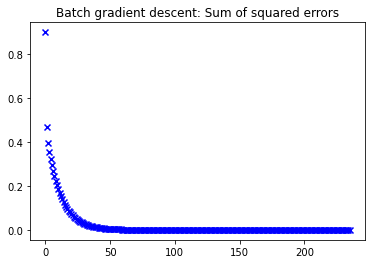

In [ ]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Batch gradient descent: Sum of squared errors")
plt.show()

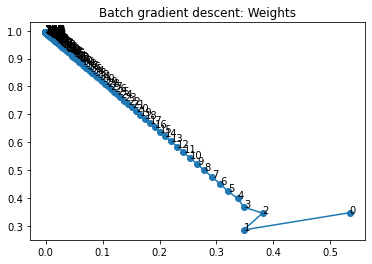

In [ ]:
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title("Batch gradient descent: Weights")
plt.show()

In [ ]:
print("===Stochastic descent===")
w = [0.0] * (len(X))
w = fit_stoch(X, y, alpha, w)
print("Weights", w)
print("SSE", sse(X, y, w))
if normalized:
    w = [w[i] * maxima[-1] / maxima[i] for i in range(len(w))]
    print("Restored weights", w)
if debug:
    print("Logs", logs)
    print("Logs stoch.", logs_stoch)

===Stochastic descent===
Epoch 499
Weights [0.003390672761850816, 0.9937307160856609]
SSE 0.0010584790929933962
Restored weights [16.515967022975325, 0.0642380071936147]


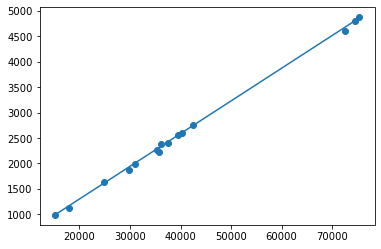

In [ ]:
plt.scatter(x_fig, y_fig)
plt.plot([min(x_fig), max(x_fig)],
         [vector.dot([1, min(x_fig)], w), 
          vector.dot([1, max(x_fig)], w)])
plt.show()

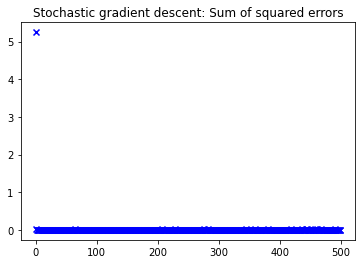

In [ ]:
plt.scatter(range(len(logs[2::3])), logs[2::3], c='b', marker='x')
plt.title("Stochastic gradient descent: Sum of squared errors")
plt.show()

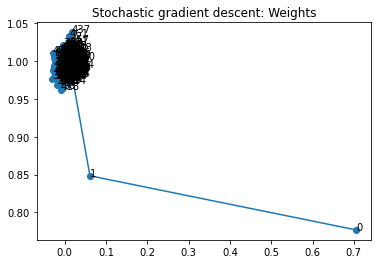

In [ ]:
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title("Stochastic gradient descent: Weights")
plt.show()

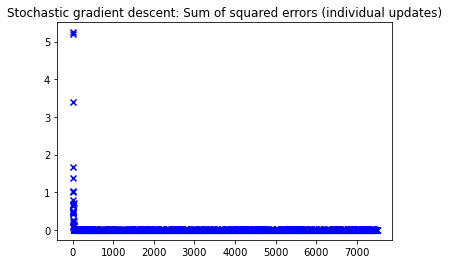

In [ ]:
plt.scatter(range(len(logs_stoch[2::3])), logs_stoch[2::3], c='b', marker='x')
plt.title("Stochastic gradient descent: Sum of squared errors (individual updates)")
plt.show()

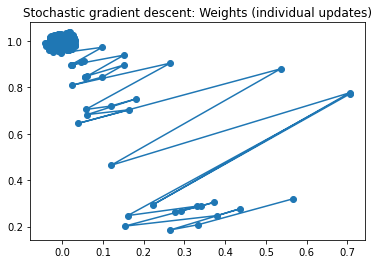

In [ ]:
plt.plot(list(map(lambda pair: pair[0], logs_stoch[0::3])), list(map(lambda pair: pair[1], logs_stoch[0::3])),
         marker='o')
plt.title("Stochastic gradient descent: Weights (individual updates)")
plt.show()

In [ ]:
X = [[1.0, 35680.0, 2217.0],
     [1.0, 42514.0, 2761.0],
     [1.0, 15162.0, 990.0],
     [1.0, 35298.0, 2274.0],
     [1.0, 29800.0, 1865.0],
     [1.0, 40255.0, 2606.0],
     [1.0, 74532.0, 4805.0],
     [1.0, 37464.0, 2396.0],
     [1.0, 31030.0, 1993.0],
     [1.0, 24843.0, 1627.0],
     [1.0, 36172.0, 2375.0],
     [1.0, 39552.0, 2560.0],
     [1.0, 72545.0, 4597.0],
     [1.0, 75352.0, 4871.0],
     [1.0, 18031.0, 1119.0],
     [1.0, 36961.0, 2503.0],
     [1.0, 43621.0, 2992.0],
     [1.0, 15694.0, 1042.0],
     [1.0, 36231.0, 2487.0],
     [1.0, 29945.0, 2014.0],
     [1.0, 40588.0, 2805.0],
     [1.0, 75255.0, 5062.0],
     [1.0, 37709.0, 2643.0],
     [1.0, 30899.0, 2126.0],
     [1.0, 25486.0, 1784.0],
     [1.0, 37497.0, 2641.0],
     [1.0, 40398.0, 2766.0],
     [1.0, 74105.0, 5047.0],
     [1.0, 76725.0, 5312.0],
     [1.0, 18317.0, 1215.0]]
y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
     1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
x_fr = [x[1] for i, x in enumerate(X) if y[i] == 1]
y_fr = [x[2] for i, x in enumerate(X) if y[i] == 1]
x_en = [x[1] for i, x in enumerate(X) if y[i] == 0]
y_en = [x[2] for i, x in enumerate(X) if y[i] == 0]
print(x_fr)

[36961.0, 43621.0, 15694.0, 36231.0, 29945.0, 40588.0, 75255.0, 37709.0, 30899.0, 25486.0, 37497.0, 40398.0, 74105.0, 76725.0, 18317.0]


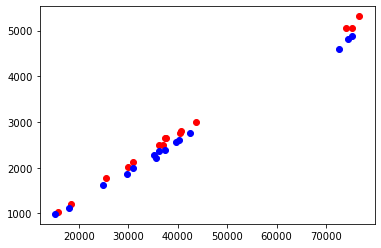

In [ ]:
plt.scatter(x_fr, y_fr, color='red')
plt.scatter(x_en, y_en, color='blue')

In [ ]:
def normalize(observations):
    maxima = [max([obs[i] for obs in observations]) for i in range(len(observations[0]))]
    return ([[obs[i] / maxima[i]
              for i in range(len(observations[0]))] for obs in observations],
            maxima)

In [ ]:
X_norm, maxima = normalize(X)
X_norm

[[1.0, 0.4650374714890844, 0.4173569277108434],
 [1.0, 0.5541088302378625, 0.5197665662650602],
 [1.0, 0.19761485826001954, 0.18637048192771086],
 [1.0, 0.460058651026393, 0.42808734939759036],
 [1.0, 0.3884001303356142, 0.3510918674698795],
 [1.0, 0.5246660149885957, 0.49058734939759036],
 [1.0, 0.9714173998044966, 0.9045557228915663],
 [1.0, 0.4882893450635386, 0.4510542168674699],
 [1.0, 0.4044314108830238, 0.37518825301204817],
 [1.0, 0.32379276637341153, 0.30628765060240964],
 [1.0, 0.47144998370804825, 0.4471009036144578],
 [1.0, 0.5155034213098729, 0.4819277108433735],
 [1.0, 0.9455197132616487, 0.8653990963855421],
 [1.0, 0.9821049201694363, 0.916980421686747],
 [1.0, 0.2350081459758879, 0.21065512048192772],
 [1.0, 0.48173346366894754, 0.4711972891566265],
 [1.0, 0.5685369827305311, 0.5632530120481928],
 [1.0, 0.2045487129358097, 0.19615963855421686],
 [1.0, 0.47221896383186707, 0.46818524096385544],
 [1.0, 0.39028999674160963, 0.37914156626506024],
 [1.0, 0.5290061909416748, 

In [ ]:
def activ_func(z):
    if z >= 0:
        return 1
    else:
        return 0

In [ ]:
def predict(X, w):
    X = np.array(X)
    w = np.array(w)
    y_predicted = X@w
    return activ_func(y_predicted)

In [ ]:
def fit_stoch(X, y, epochs=1000, max_misclassified=0, verbose=True):
    """
    Stochastic gradient descent
    :param X:
    :param y:
    :param max_misclassified:
    :param w:
    :param epochs:
    :param epsilon:
    :return:
    """
    
    alpha = 1/len(X)
    test_array = np.random.choice(len(X), size = 100000)
    index = 0
    misclassified = 0
    w = [0.0] * 3
    random.seed(0)
    idx = list(range(len(X)))
    for j in test_array:
        index += 1
        y_hat = predict([X[j]], w)
        loss = y[j] - y_hat
        gradient = vector.mul(loss, X[j])    
        w = vector.add(w, vector.mul(alpha, gradient))
        if index == 20000:
            index = 0
            random.shuffle(idx)
            for i in idx:
                y_hat = predict([X[i]], w)
                loss = y[i] - y_hat
                gradient = vector.mul(loss, X[i])    
                w = vector.add(w, vector.mul(alpha, gradient))
                if y_hat != y[i]:                             
                    misclassified += 1
                if misclassified == max_misclassified:
                    break 
    return w                



In [ ]:
w = fit_stoch(X_norm, y)
w

[0.0, -0.05442163571195832, 0.05715361445783129]

In [ ]:
w = [w[i] * maxima[-1] / maxima[i] for i in range(len(w))]
print("Restored weights", w)
w = [w[j] / w[-1] for j in range(len(w))]
print("Weights with y set to 1", w)

Restored weights [0.0, -0.0037678426706017937, 0.057153614457831285]
Weights with y set to 1 [0.0, -0.06592483618655054, 1.0]


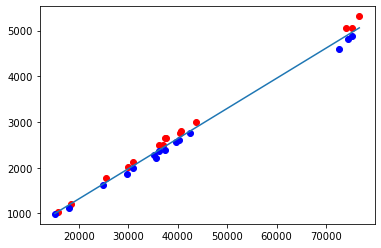

In [ ]:
plt.scatter(x_fr, y_fr, color='red')
plt.scatter(x_en, y_en, color='blue')
plt.plot([min(x_fr + x_en), max(x_fr + x_en)],
             [-w[1] * min(x_fr + x_en) - w[0], -w[1] * max(x_fr + x_en) - w[0]])

In [ ]:
def leave_one_out_cross_val(X, y, fitting_function):
    global classification, total
    classification = 0
    total = 0.0
    
    for i in range(len(X)):
        sample_x = X[i]
        sample_y = y[i]
        sample_x = np.array(sample_x).reshape(1, -1)
        sample_y = np.array(sample_y).reshape(1, -1)
        misclassified = 0
        
        train_x = np.delete(X,i,axis=0)
        train_y = np.delete(y,i,axis=0)
        
        w = fitting_function(train_x, train_y)
        print(sample_x)
        print(w)
        if(sample_y != predict(sample_x, w)):
            misclassified += 1
            classification += 1 
    
        print("Weights: " + str(w))        
        print("Misclassifications : " + str(misclassified) + "\n")
        
    total = (len(X) - classification) / len(X)
    return total, w   
      

In [ ]:
stoch_accuracy = leave_one_out_cross_val(X_norm, y, fit_stoch)
print('Cross-validation accuracy (stochastic):', stoch_accuracy)

[[1.         0.46503747 0.41735693]]
[0.0, -0.09504342647835423, 0.09996884088076441]
Weights: [0.0, -0.09504342647835423, 0.09996884088076441]
Misclassifications : 0

[[1.         0.55410883 0.51976657]]
[0.0, -0.13958494848372505, 0.14588310137100097]
Weights: [0.0, -0.13958494848372505, 0.14588310137100097]
Misclassifications : 0

[[1.         0.19761486 0.18637048]]
[0.0, -0.07919731238974852, 0.08296764644786038]
Weights: [0.0, -0.07919731238974852, 0.08296764644786038]
Misclassifications : 0

[[1.         0.46005865 0.42808735]]
[0.0, -0.09709239222031231, 0.10141644162858324]
Weights: [0.0, -0.09709239222031231, 0.10141644162858324]
Misclassifications : 0

[[1.         0.38840013 0.35109187]]
[0.0, -0.10550802799968537, 0.1107966348151225]
Weights: [0.0, -0.10550802799968537, 0.1107966348151225]
Misclassifications : 0

[[1.         0.52466601 0.49058735]]
[0.0, -0.09587802384242886, 0.10109835895305354]
Weights: [0.0, -0.09587802384242886, 0.10109835895305354]
Misclassifications

In [ ]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def predict_proba(X, w):
    X = np.array(X)
    w = np.array(w)
    x = np.dot(X, w)
    return logistic(x) 

In [ ]:
def predict(X, w):
    prob = predict_proba(X, w)
    if prob > 0.5:
        return 1
    else: 
        return 0


In [ ]:
import random
def fit_stoch_log(X, y, alpha=100, epochs=1000, epsilon=1.0e-4, verbose=False):
    alpha = 1/len(X)
    test_array = np.random.choice(len(X), size = 100000)
    index = 0
    misclassified = 0
    w = [0.0] * 3
    random.seed(0)
    idx = list(range(len(X)))
    for j in test_array:
        index += 1
        y_hat = predict([X[j]], w)
        loss = y[j] - y_hat
        gradient = vector.mul(loss, X[j])    
        w = vector.add(w, vector.mul(alpha, gradient))
        if index == 20000:
            index = 0
            random.shuffle(idx)
            for i in idx:
                y_hat = predict([X[i]], w)
                loss = y[i] - y_hat
                gradient = vector.mul(loss, X[i])    
                w = vector.add(w, vector.mul(alpha, gradient))
                if vector.norm(w) < epsilon:                             
                    break  
    return w


In [ ]:
w = fit_stoch_log(X_norm, y, verbose=True)
w


[0.0, -0.06773020527859247, 0.07091490963855421]

In [ ]:
w = [w[i] / maxima[i] for i in range(len(w))]
print("Restored weights", w)
w = [w[j] / w[-1] for j in range(len(w))]
print("Weights with y set to 1", w)

Restored weights [0.0, -8.827657905323229e-07, 1.3349945338583247e-05]
Weights with y set to 1 [0.0, -0.0661250490652575, 1.0]


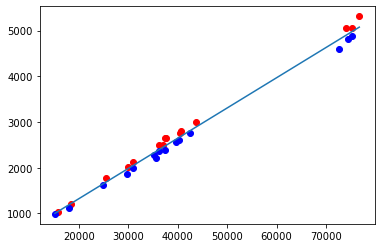

In [ ]:
plt.scatter(x_fr, y_fr, color='red')
plt.scatter(x_en, y_en, color='blue')
plt.plot([min(x_fr + x_en), max(x_fr + x_en)],
         [-w[1] * min(x_fr + x_en) - w[0], -w[1] * max(x_fr + x_en) - w[0]])
plt.show()

In [ ]:
def leave_one_out_cross_val(X, y, fitting_function):
    global classification, total
    classification = 0
    total = 0.0
    for i in range(len(X)):
        sample_x = X[i]
        sample_y = y[i]
        sample_x = np.array(sample_x).reshape(1, -1)
        sample_y = np.array(sample_y).reshape(1, -1)
        misclassified = 0
        
        train_x = np.delete(X,i,axis=0)
        train_y = np.delete(y,i,axis=0)
        
        w = fitting_function(train_x, train_y)
        print(sample_x)
        print(w)
        if(sample_y != predict(sample_x, w)):
            misclassified += 1
            classification += 1
    
        print("Weights: " + str(w))        
        print("Misclassifications : " + str(misclassified) + "\n")
    total = (len(X) - classification) / len(X)    
    return total, w   

In [ ]:
stoch_accuracy = leave_one_out_cross_val(X, y, fit_stoch_log)
print('Cross-validation accuracy (stoch):', stoch_accuracy)

<ipython-input-224-96e04259b7cc>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[[1.000e+00 3.568e+04 2.217e+03]]
[0.7931034482758619, -318.03448275863207, 4813.103448275842]
Weights: [0.7931034482758619, -318.03448275863207, 4813.103448275842]
Misclassifications : 0

[[1.0000e+00 4.2514e+04 2.7610e+03]]
[0.13793103448275862, -293.5172413793173, 4432.344827586197]
Weights: [0.13793103448275862, -293.5172413793173, 4432.344827586197]
Misclassifications : 0

[[1.0000e+00 1.5162e+04 9.9000e+02]]
[0.10344827586206896, -124.6206896551796, 1896.6206896551746]
Weights: [0.10344827586206896, -124.6206896551796, 1896.6206896551746]
Misclassifications : 0

[[1.0000e+00 3.5298e+04 2.2740e+03]]
[-0.8620689655172411, -485.5862068965653, 7324.17241379308]
Weights: [-0.8620689655172411, -485.5862068965653, 7324.17241379308]
Misclassifications : 0

[[1.000e+00 2.980e+04 1.865e+03]]
[0.34482758620689663, -113.5862068965564, 1721.9655172413827]
Weights: [0.34482758620689663, -113.5862068965564, 1721.9655172413827]
Misclassifications : 0

[[1.0000e+00 4.0255e+04 2.6060e+03]]
[-0.103

In [ ]:
def plot_logistic_surf(x_range, y_range, w_opt):
    z_axis = np.array([[0.0] * len(y_range) for i in range(len(x_range))])
    x_axis, y_axis = np.meshgrid(x_range, y_range)
    z_axis = z_axis.reshape(x_axis.shape)

    # We compute the probability surface as a function of x and y
    for i in range(len(x_range)):
        for j in range(len(y_range)):
            z_axis[j, i] = logistic(np.dot([1, x_range[i], y_range[j]], w_opt))
    return x_axis, y_axis, z_axis

In [ ]:
x_range = np.linspace(0, 100000, 200)
y_range = np.linspace(0, 10000, 200)
#w = [2.073225839414742, -0.049125455233437906, 0.7440143556104162]

x_axis, y_axis, z_axis = plot_logistic_surf(x_range, y_range, w)

fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.gca(projection='3d')

surf = ax.plot_surface(y_axis, x_axis, z_axis, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
# We plot the observations
for x, y_class in zip(X, y):
    if y_class == 1:
        ax.scatter(x[2], x[1], y_class, color='green', marker='x')
    else:
        ax.scatter(x[2], x[1], y_class, color='red', marker='x')

ax.elev = 30 
ax.azim = -150
plt.show()

In [ ]:
X = np.array(X)
X_norm = np.array(X_norm)
y = np.array(y)

In [ ]:
X = X[:, 1:]
X_norm = X_norm[:, 1:]

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X, y)
model.coef_

In [ ]:
model.predict(X)

In [ ]:
model.predict_proba(X)

In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(X, y, epochs=1500, batch_size=4, verbose=0)

In [ ]:
y

In [ ]:
model.predict(X)

In [ ]:
model.predict_classes(X)